# 다항회귀로 과소적합, 과대적합 이해
- 1.X와 y가 잡음(Noise)이 포함된 다항식의 Coisine 그래프 관계를 가지도록 만듬
- 2.다항회귀 차수를 변환하면서 그에 따른 회귀예측 곡선과 예측 정확도 비교

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환값 반환
def cosine_func(X):
    return np.cos(1.5*np.pi*X)

#X는 0~1까지 30개의 임의의 값을 순서대로 샘플링
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = cosine_func(X) + np.random.randn(n_samples) * 0.1

In [2]:
X

array([0.0202184 , 0.07103606, 0.0871293 , 0.11827443, 0.14335329,
       0.38344152, 0.41466194, 0.4236548 , 0.43758721, 0.46147936,
       0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456,
       0.60276338, 0.63992102, 0.64589411, 0.71518937, 0.77815675,
       0.78052918, 0.79172504, 0.79915856, 0.83261985, 0.87001215,
       0.891773  , 0.92559664, 0.94466892, 0.96366276, 0.97861834])

In [3]:
y

array([ 1.0819082 ,  0.87027612,  1.14386208,  0.70322051,  0.78494746,
       -0.25265944, -0.22066063, -0.26595867, -0.4562644 , -0.53001927,
       -0.86481449, -0.99462675, -0.87458603, -0.83407054, -0.77090649,
       -0.83476183, -1.03080067, -1.02544303, -1.0788268 , -1.00713288,
       -1.03009698, -0.63623922, -0.86230652, -0.75328767, -0.70023795,
       -0.41043495, -0.50486767, -0.27907117, -0.25994628, -0.06189804])

**예측결과를 비교할 다항식 차수를 1,7,15 로 변경하면서 예측 결과 비교**
- 다항식 차수별 학습 수행 후 cross_val_score()로 MSE값을 구해 차수별 예측성능 평가

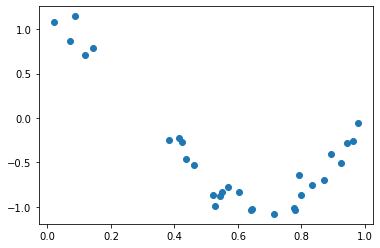

In [4]:
plt.scatter(X,y)


 Degree1 회귀계수는 [-1.61]입니다
Degree 1 MSE는 0.40772896250986845 입니다.

 Degree7 회귀계수는 [ 5.20000e-01 -4.01900e+01  2.16520e+02 -6.47290e+02  1.01367e+03
 -7.70200e+02  2.25970e+02]입니다
Degree 7 MSE는 0.19717711411737052 입니다.

 Degree15 회귀계수는 [-2.98292000e+03  1.03899210e+05 -1.87415866e+06  2.03716020e+07
 -1.44873197e+08  7.09315193e+08 -2.47065814e+09  6.24561298e+09
 -1.15676589e+10  1.56895083e+10 -1.54006206e+10  1.06457414e+10
 -4.91378328e+09  1.35919894e+09 -1.70381130e+08]입니다
Degree 15 MSE는 181082440.2842794 입니다.


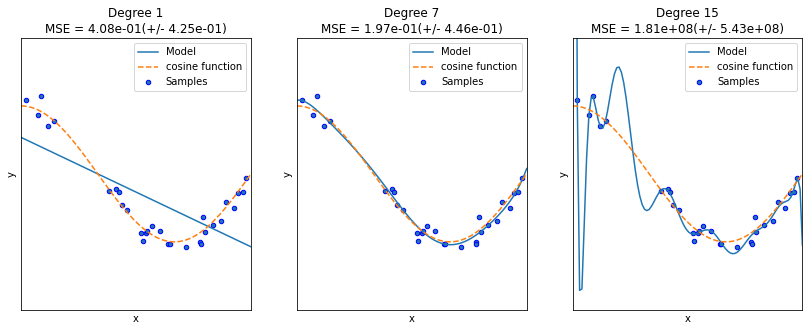

In [6]:
plt.figure(figsize=(14,5))
degrees = [1,7,15]

for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees),i+1)
    plt.setp(ax,xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features",polynomial_features),
                       ("linear_regression",linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    #교차검증
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
    #pipline 구성 중 세부객체를 접근하는 named_steps['객체명'] 으로 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    
    print('\n Degree{0} 회귀계수는 {1}입니다'.format(degrees[i], np.round(coefficients,2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i],-1*np.mean(scores)))
    
    # 0~1까지 테스트 데이터세트를 100개로 나눠 예측 수행
    # 테스트 데이터 세트에 회귀예측 수행 후 예측곡선과 실제 곡선 비교
    X_test = np.linspace(0,1,100)
    plt.plot(X_test,pipeline.predict(X_test[:,np.newaxis]),label="Model")
    plt.plot(X_test, cosine_func(X_test),'--',label = 'cosine function')
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()